In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
kims = pd.read_csv("adult_5kims_0.01ew_200epochs.csv")
kims["Method"] = "Kim et al."

cvae = pd.read_csv("adult_cae.csv")
cvae["Method"] = "Ours – cVAE"

sinn = pd.read_csv("adult_inn_ae_encoder.csv")
sinn["Method"] = "Ours – cFlow"

base = pd.read_csv("adult_naive_baseline_200epochs.csv")
base["Method"] = "CNN"

all_data = pd.concat([kims, base, cvae, sinn], axis='rows', sort=False)

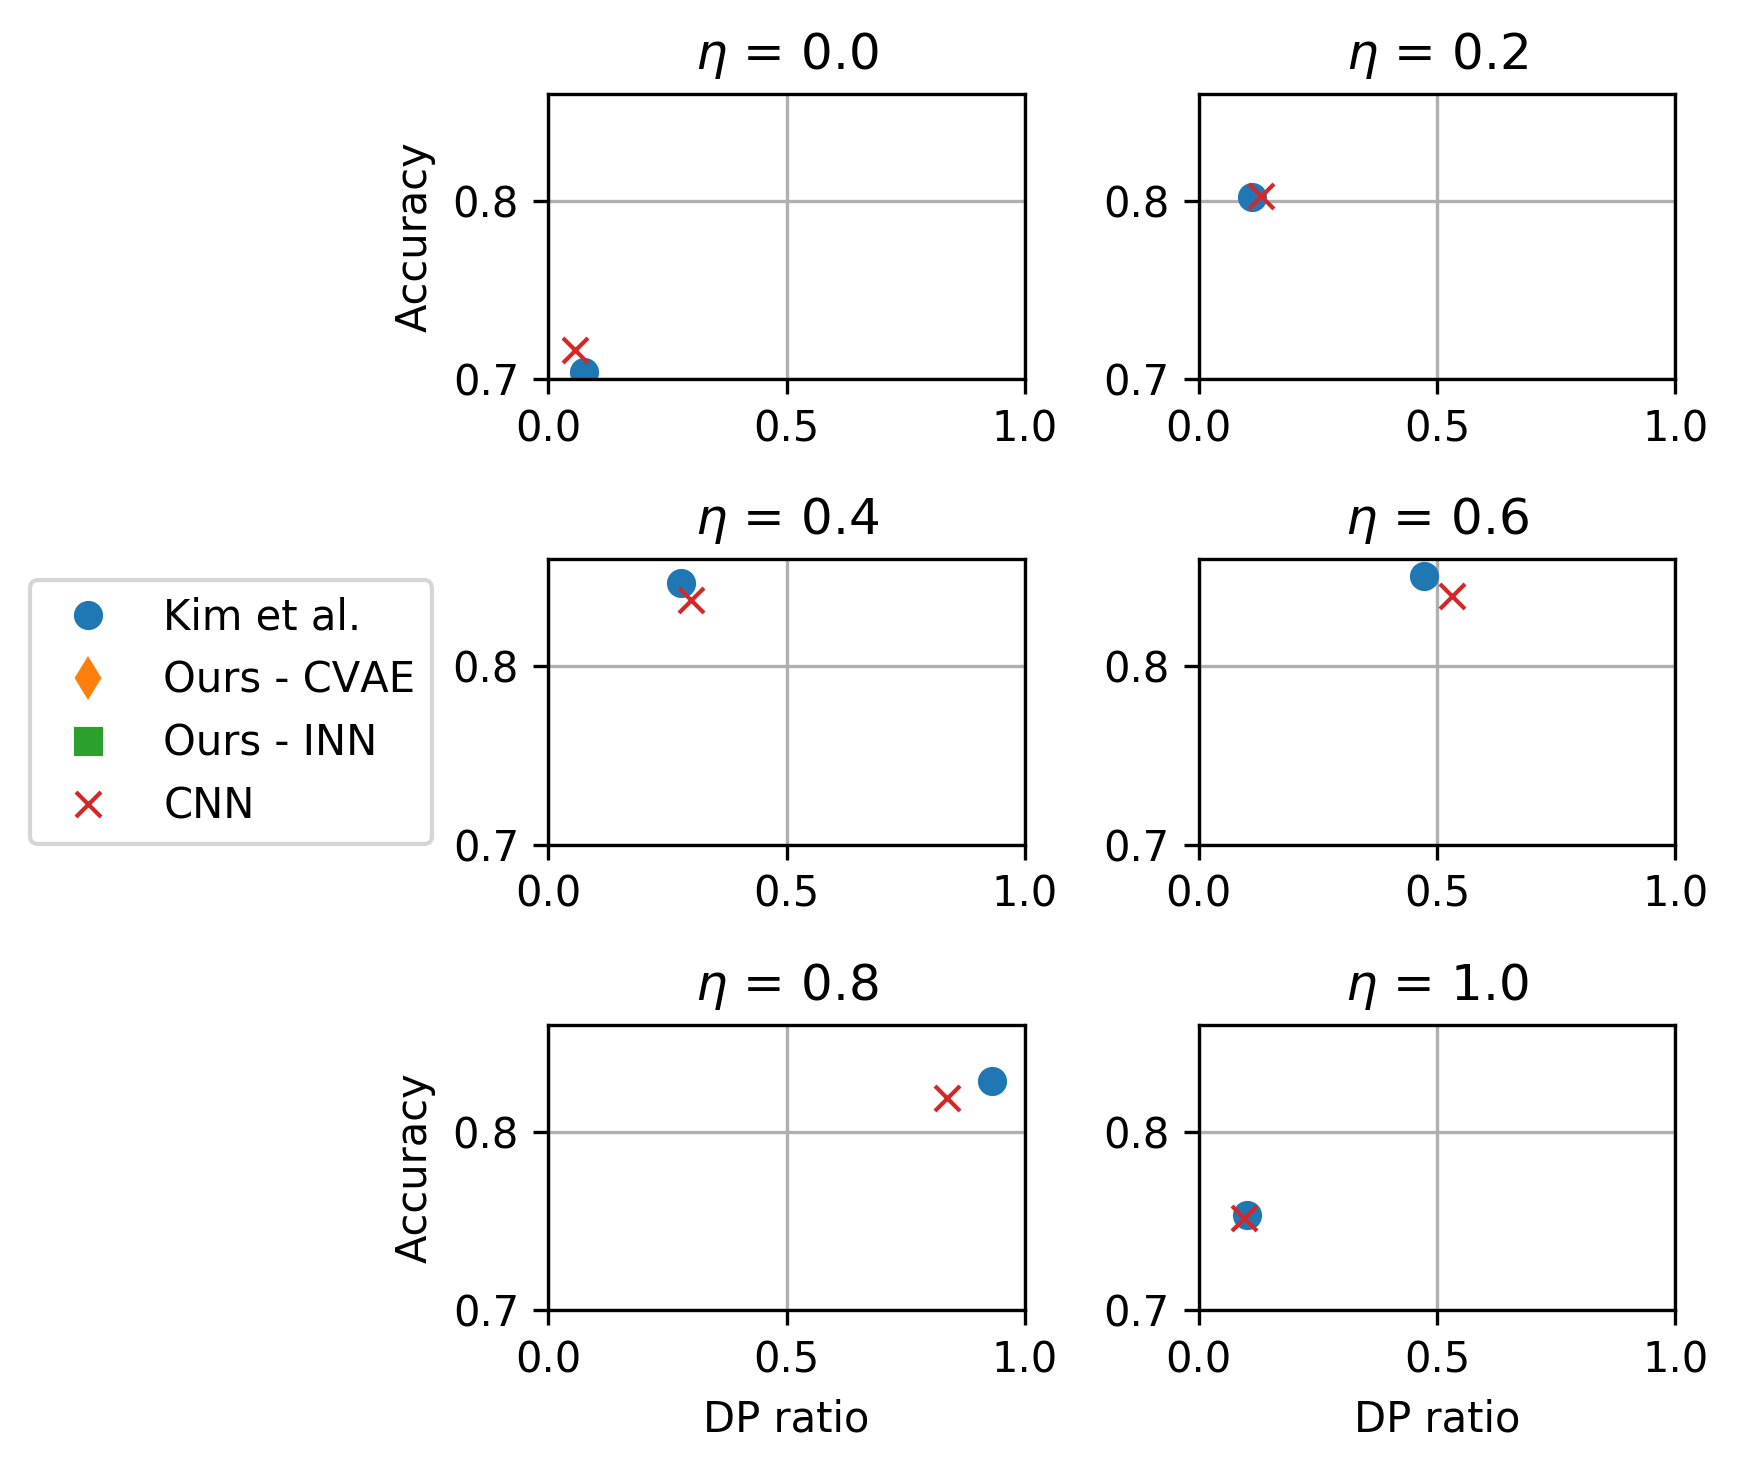

In [3]:
fig, plots = plt.subplots(nrows=3, ncols=2, figsize=(6, 5), dpi=300)
flat_plots = []
for plot in plots:
    flat_plots += plot.tolist()

for i, (plot, mix_fact) in enumerate(zip(flat_plots, [.0, 0.2, 0.4, 0.6, 0.8, 1.])):

    for method, shape in zip(("Kim et al.", "Ours - CVAE", "Ours - INN", "CNN"), ("o", "d", "s", "x")):
        data = all_data.query(f"Mix_fact == \"{mix_fact}\" & Method == \"{method}\"")
        plot.plot(data["prob_pos_sex_Male_0/sex_Male_1"], data["Accuracy"], marker=shape, linestyle="", label=method)
    plot.set_title(f"$\\eta$ = {mix_fact}")
    plot.grid(True)
    plot.set_xlim((0, 1))
    plot.set_ylim((0.7, 0.86))
    if i == 2:
        plot.legend(loc='upper right', bbox_to_anchor=(-0.20, 1))
    if i in (4, 5):
        plot.set_xlabel("DP ratio")
    if i in (0, 4):
        plot.set_ylabel("Accuracy")

fig.tight_layout()
fig.savefig("nosinn_adult_multiplot.pdf")

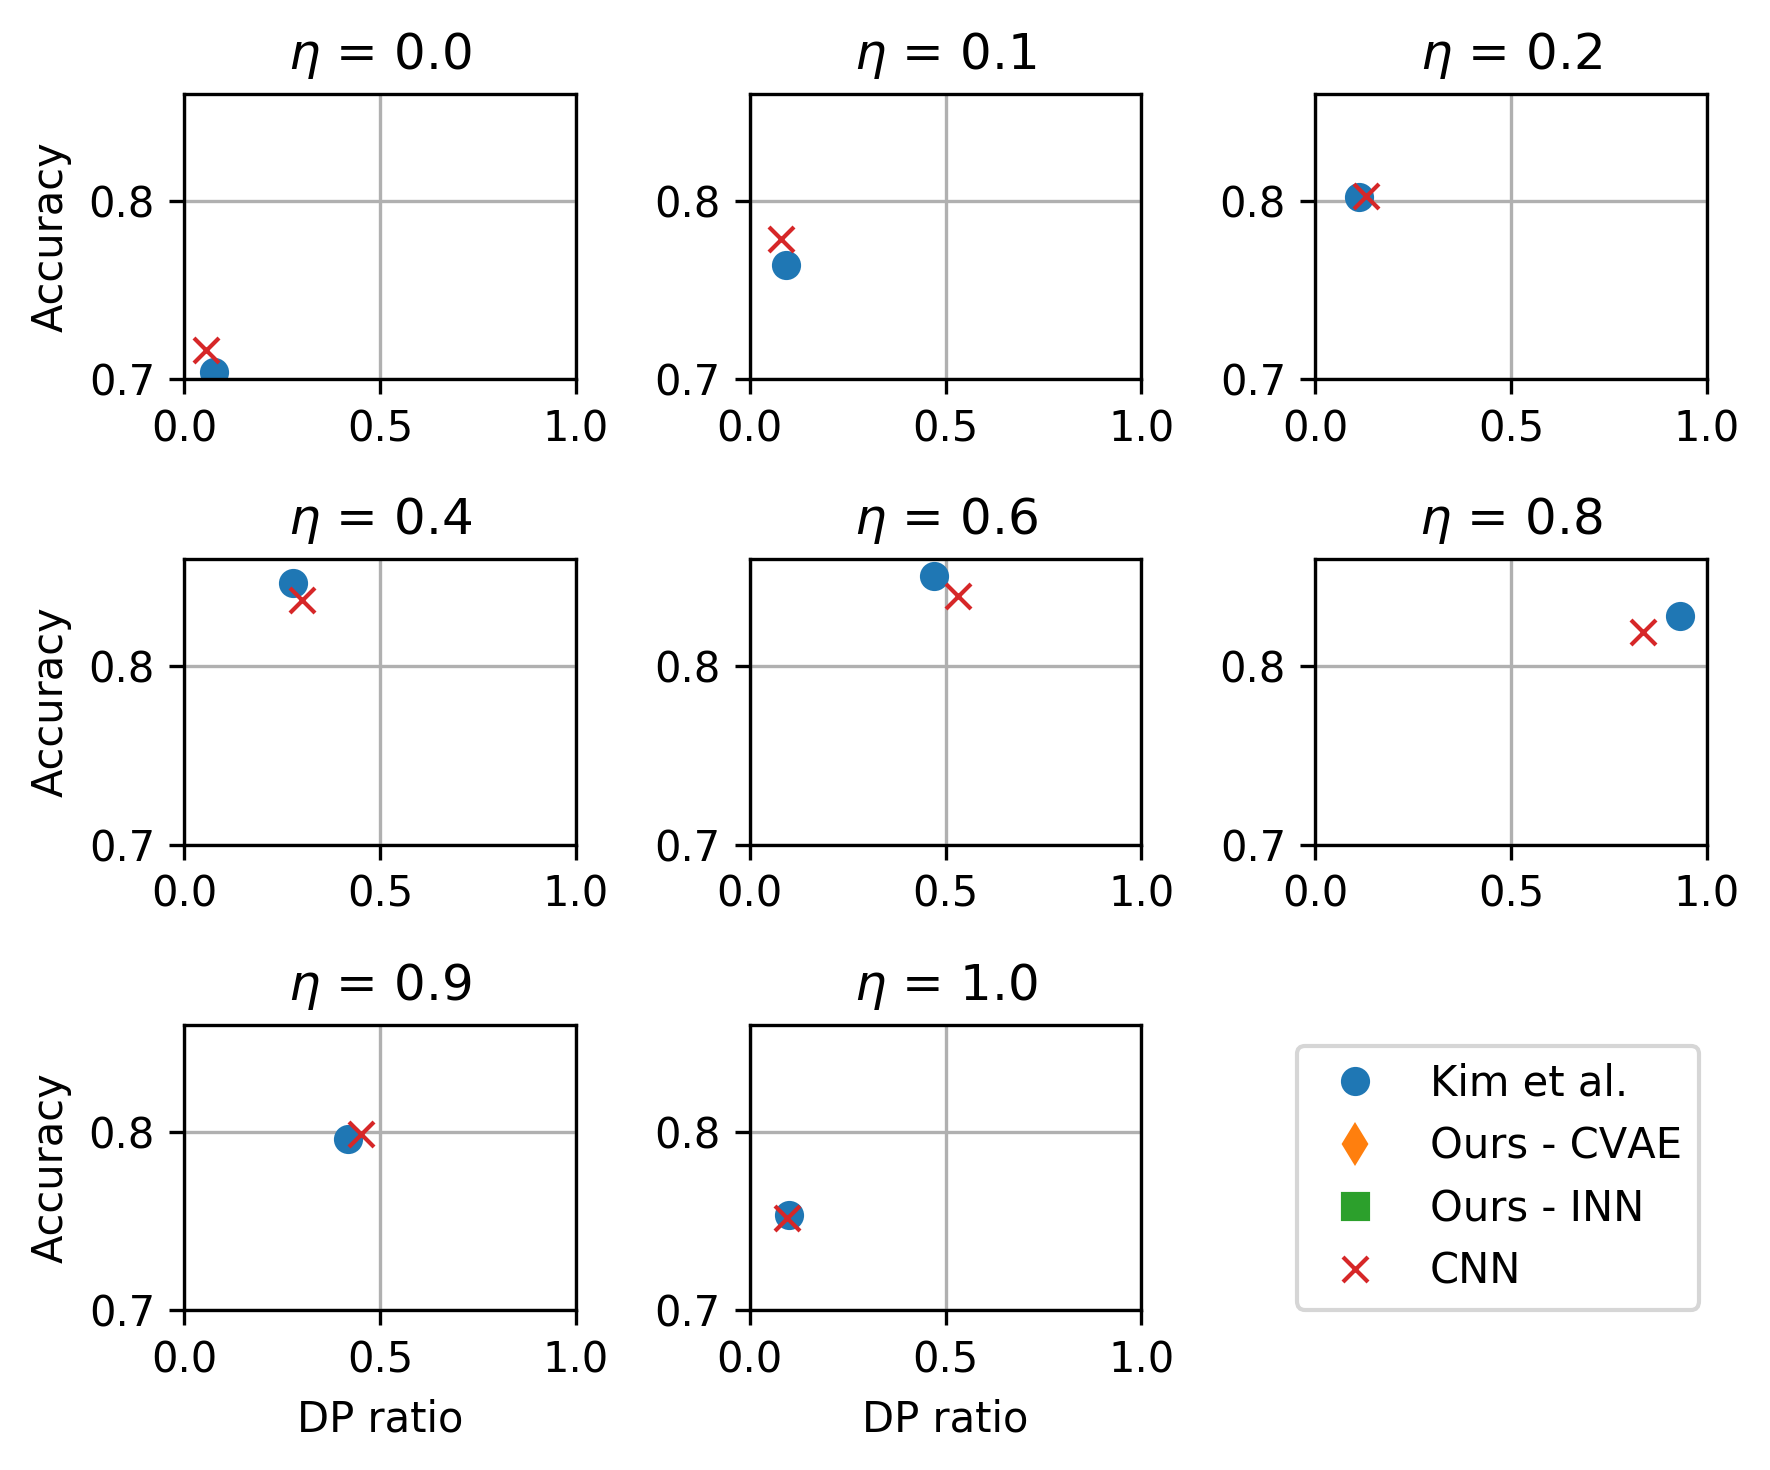

In [4]:
fig, plots = plt.subplots(nrows=3, ncols=3, figsize=(6, 5), dpi=300, facecolor='white')
flat_plots = []
for plot in plots:
    flat_plots += plot.tolist()

for i, (plot, mix_fact) in enumerate(zip(flat_plots, [.0, .1, .2, .4, .6, .8, .9, 1., None])):
    for method, shape in zip(("Kim et al.", "Ours - CVAE", "Ours - INN", "CNN"), ("o", "d", "s", "x")):
        data = all_data.query(f"Mix_fact == \"{mix_fact}\" & Method == \"{method}\"")
        plot.plot(data["prob_pos_sex_Male_0/sex_Male_1"], data["Accuracy"], marker=shape, linestyle="", label=method)
    if mix_fact is not None:
        plot.set_title(f"$\\eta$ = {mix_fact}")
    plot.grid(True)
    plot.set_xlim((0, 1))
    plot.set_ylim((0.7, 0.86))
    if i == 8:
        plot.axis("off")
        plot.legend(loc='upper left', bbox_to_anchor=(-0.1, 1))
    if i in (6, 7):
        plot.set_xlabel("DP ratio")
    if i in (0, 3, 6):
        plot.set_ylabel("Accuracy")

fig.tight_layout()
fig.savefig("nosinn_adult_multiplot.pdf")

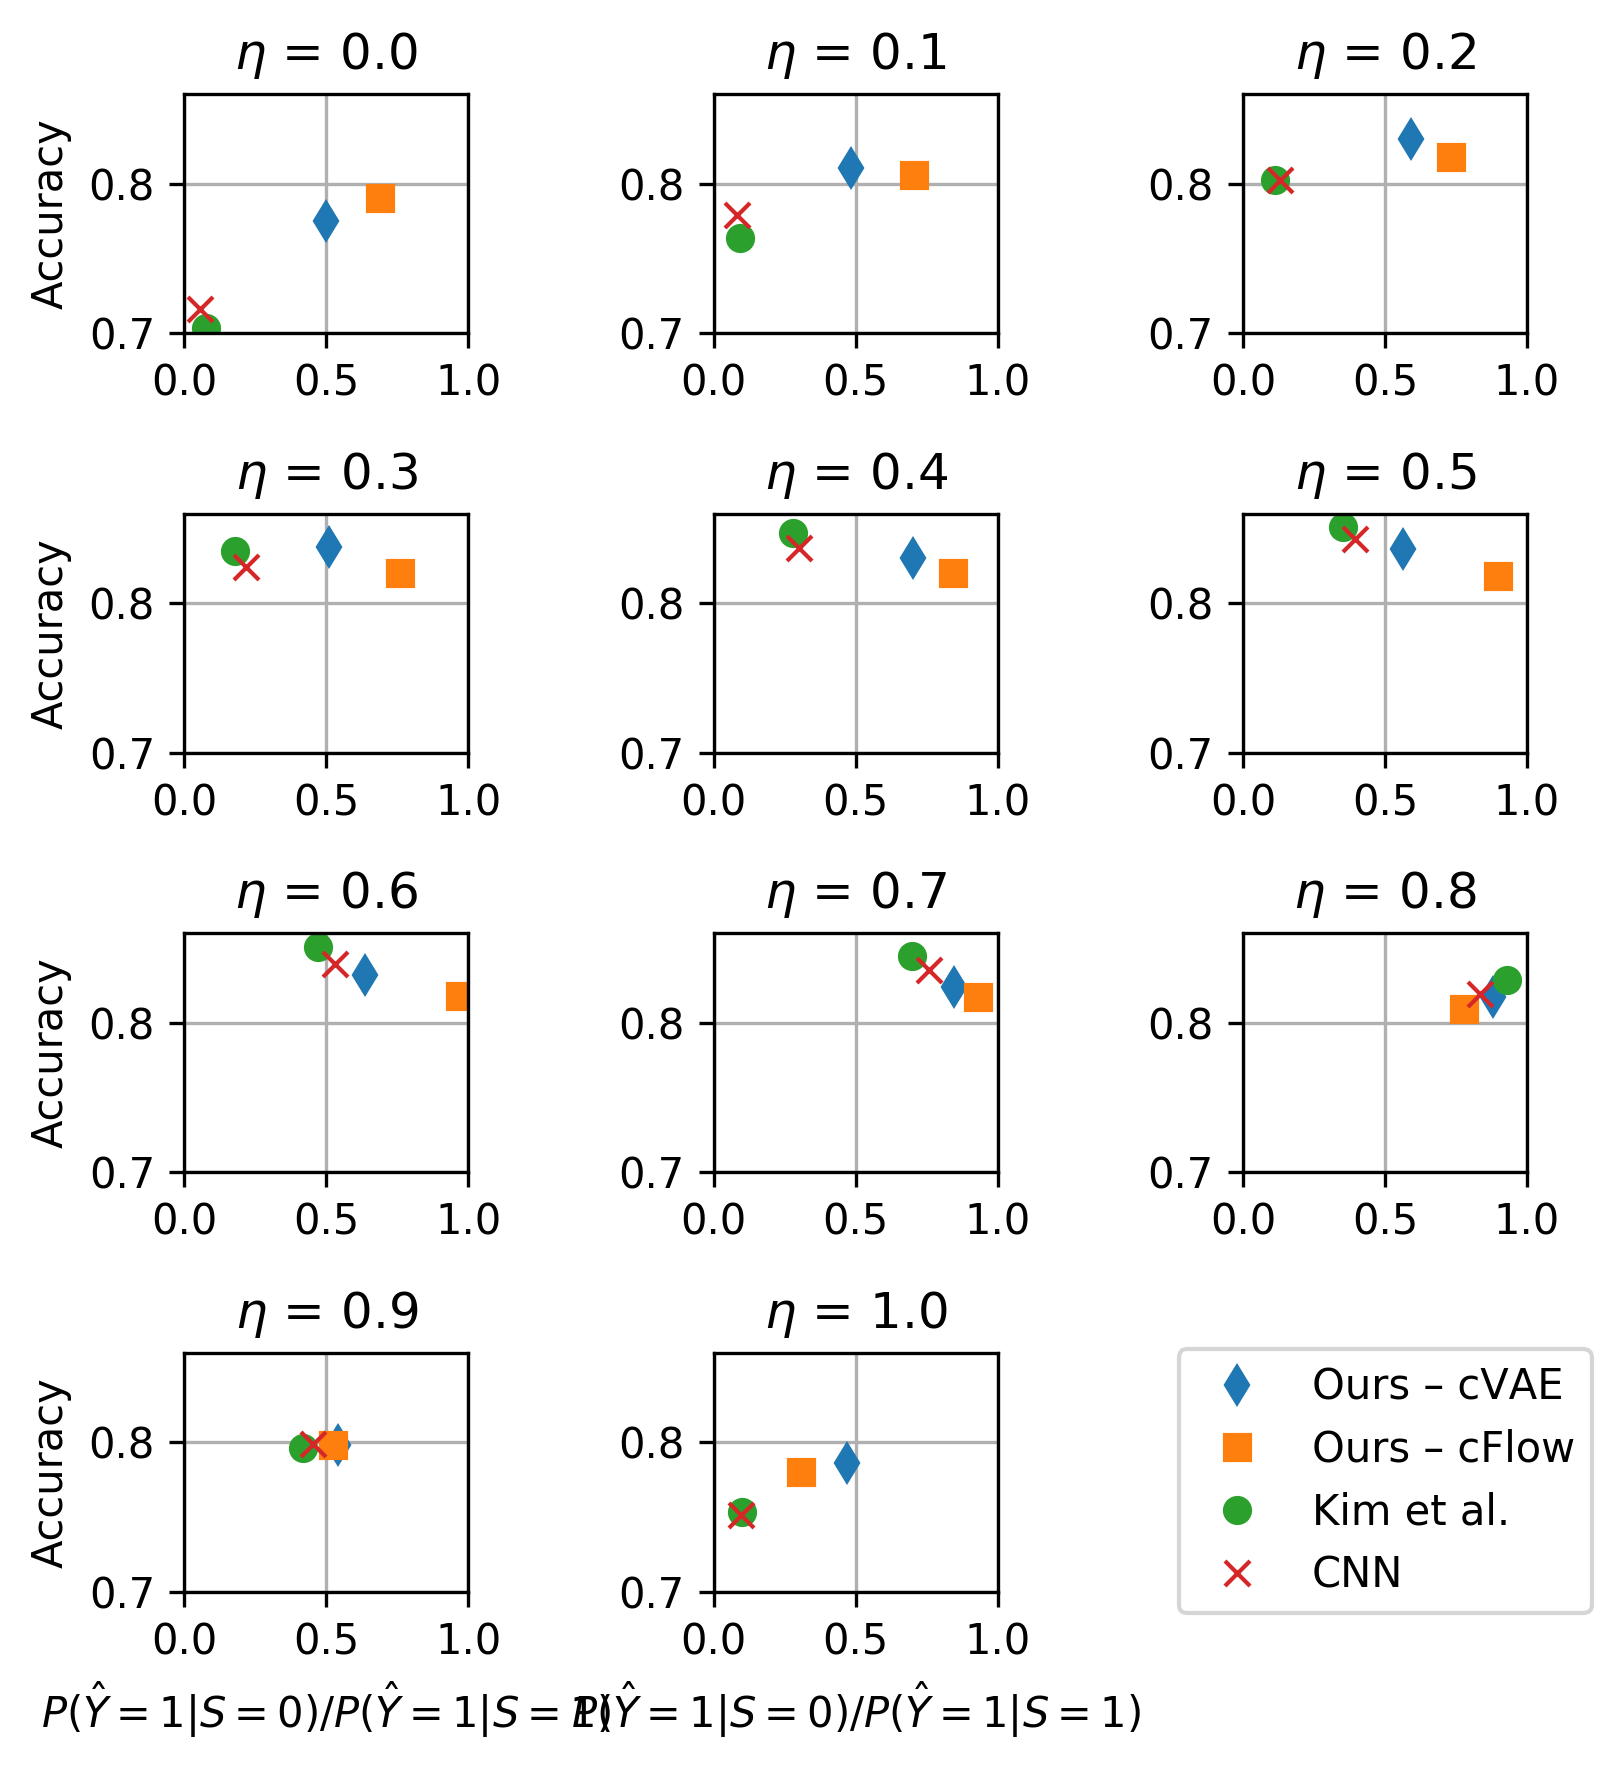

In [5]:
fig, plots = plt.subplots(nrows=4, ncols=3, figsize=(5.4, 6), dpi=300)
flat_plots = []
for plot in plots:
    flat_plots += plot.tolist()

for i, (plot, mix_fact) in enumerate(zip(flat_plots, [.0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1., None])):
    for method, shape in zip(("Ours – cVAE", "Ours – cFlow", "Kim et al.", "CNN"), ("d", "s", "o", "x")):
        data = all_data.query(f"Mix_fact == \"{mix_fact}\" & Method == \"{method}\"")
        plot.plot(data["prob_pos_sex_Male_0/sex_Male_1"], data["Accuracy"], marker=shape, linestyle="", label=method)
    if mix_fact is not None:
        plot.set_title(f"$\\eta$ = {mix_fact}")
    plot.grid(True)
    plot.set_xlim((0, 1))
    plot.set_ylim((0.7, 0.86))
    if i == 11:
        plot.axis("off")
        plot.legend(loc='upper left', bbox_to_anchor=(-0.3, 1.1))
    if i in (9, 10):
        plot.set_xlabel(r"$P(\hat{Y}=1|S=0)/P(\hat{Y}=1|S=1)$")
    if i in (0, 3, 6, 9):
        plot.set_ylabel("Accuracy")

fig.tight_layout()
# fig.savefig("nosinn_adult_multiplot_all.pdf")

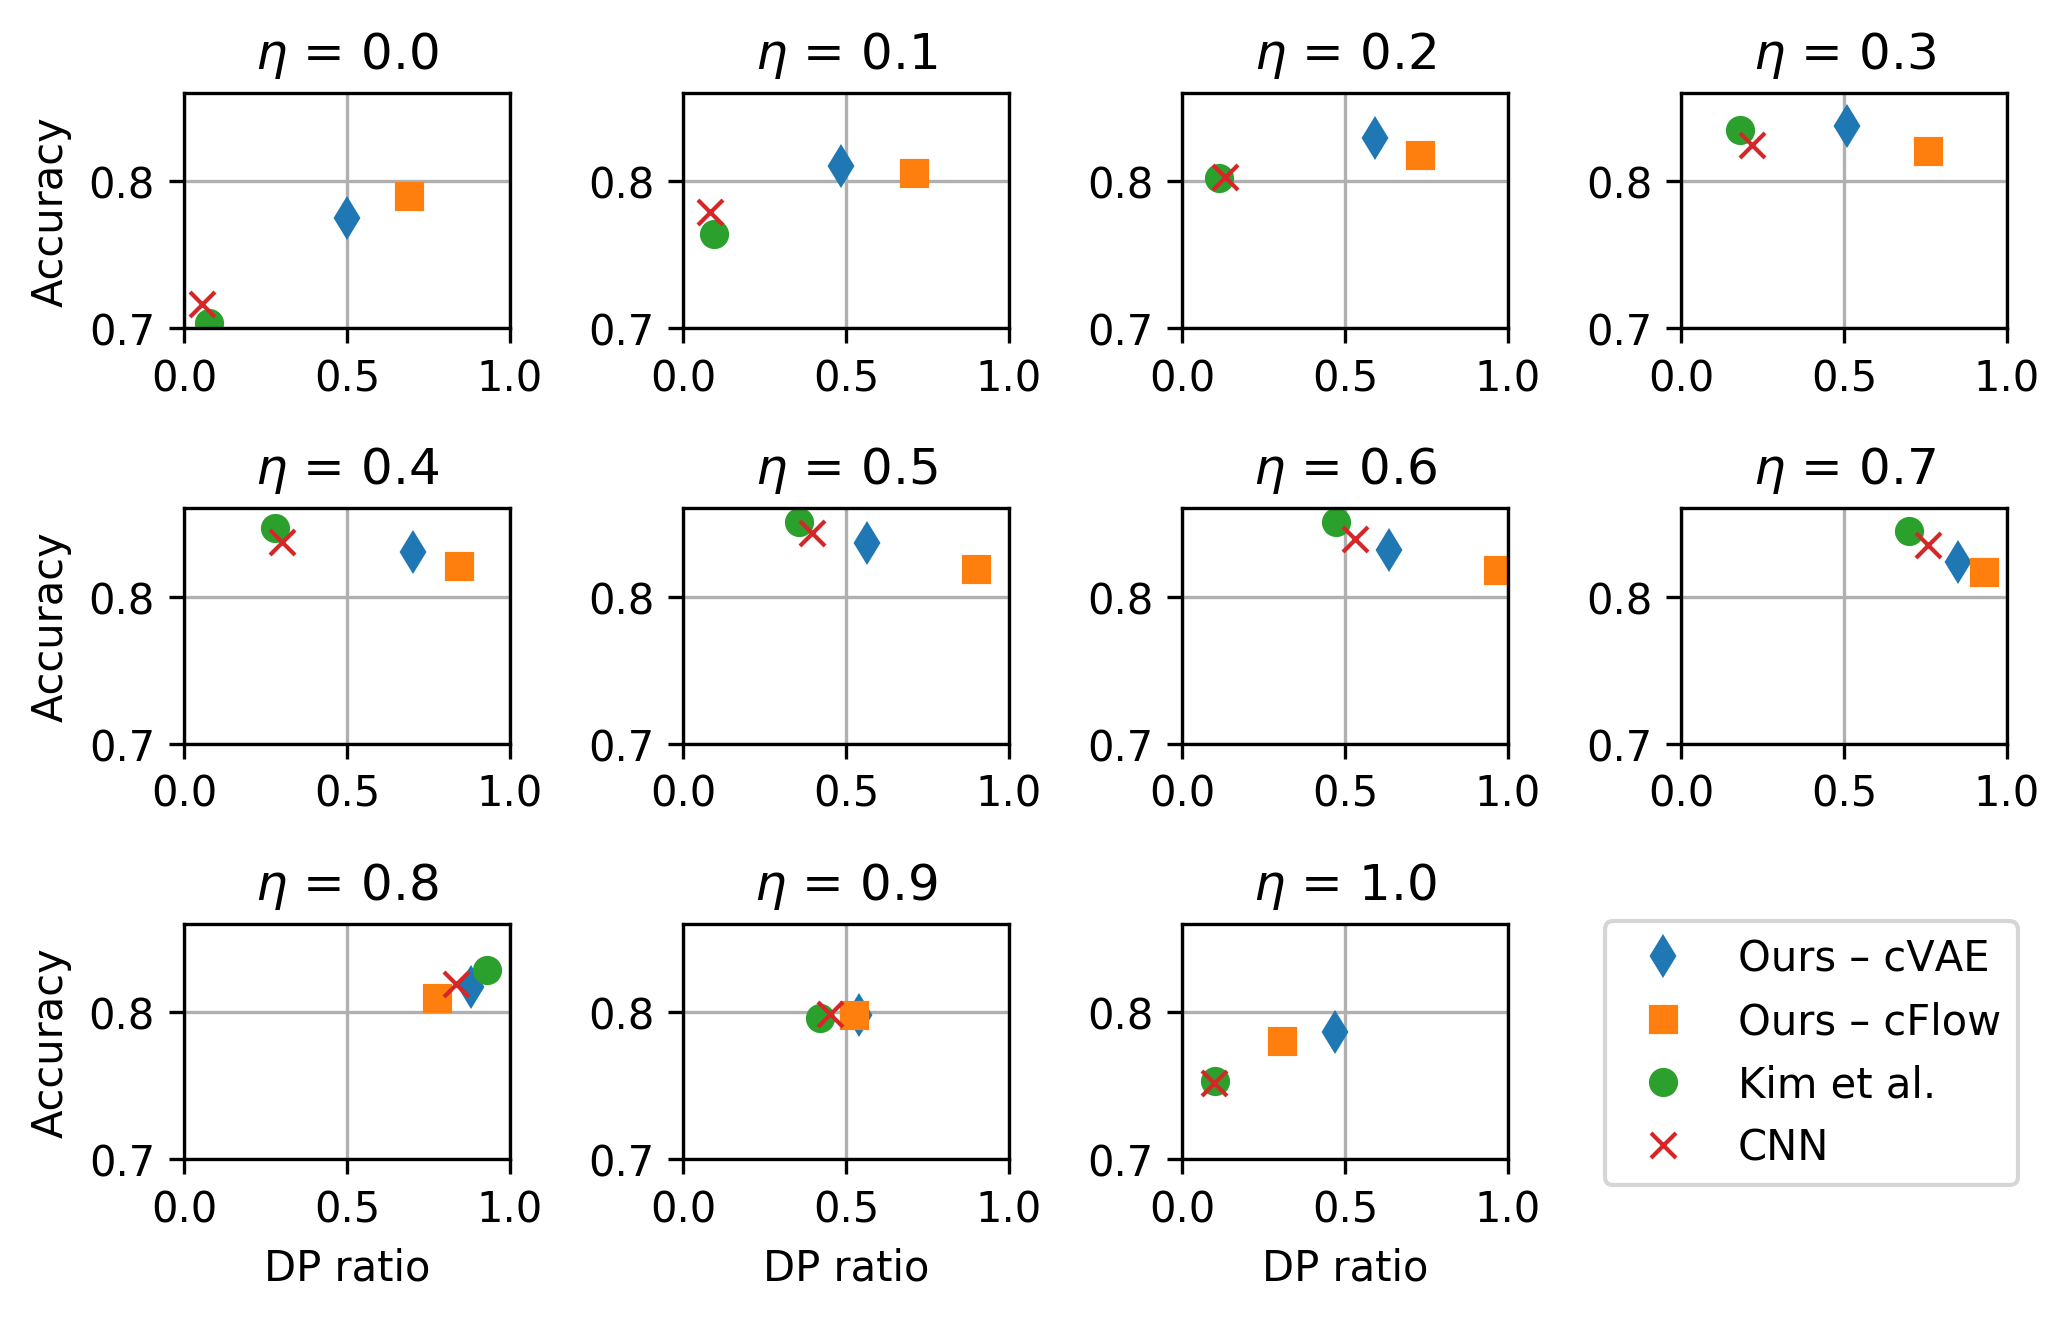

In [6]:
fig, plots = plt.subplots(nrows=3, ncols=4, figsize=(7, 4.5), dpi=300)#, facecolor='white')
flat_plots = []
for plot in plots:
    flat_plots += plot.tolist()

for i, (plot, mix_fact) in enumerate(zip(flat_plots, [.0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1., None])):
    for method, shape in zip(("Ours – cVAE", "Ours – cFlow", "Kim et al.", "CNN"), ("d", "s", "o", "x")):
        data = all_data.query(f"Mix_fact == \"{mix_fact}\" & Method == \"{method}\"")
        plot.plot(data["prob_pos_sex_Male_0/sex_Male_1"], data["Accuracy"], marker=shape, linestyle="", label=method)
    if mix_fact is not None:
        plot.set_title(f"$\\eta$ = {mix_fact}")
    plot.grid(True)
    plot.set_xlim((0, 1))
    plot.set_ylim((0.7, 0.86))
    if i == 11:
        plot.axis("off")
        plot.legend(loc='upper left', bbox_to_anchor=(-0.3, 1.1))
    if i in (8, 9, 10):
        plot.set_xlabel("DP ratio")
    if i in (0, 4, 8):
        plot.set_ylabel("Accuracy")

fig.tight_layout()
fig.savefig("nosinn_adult_multiplot_all_landscape.pdf")

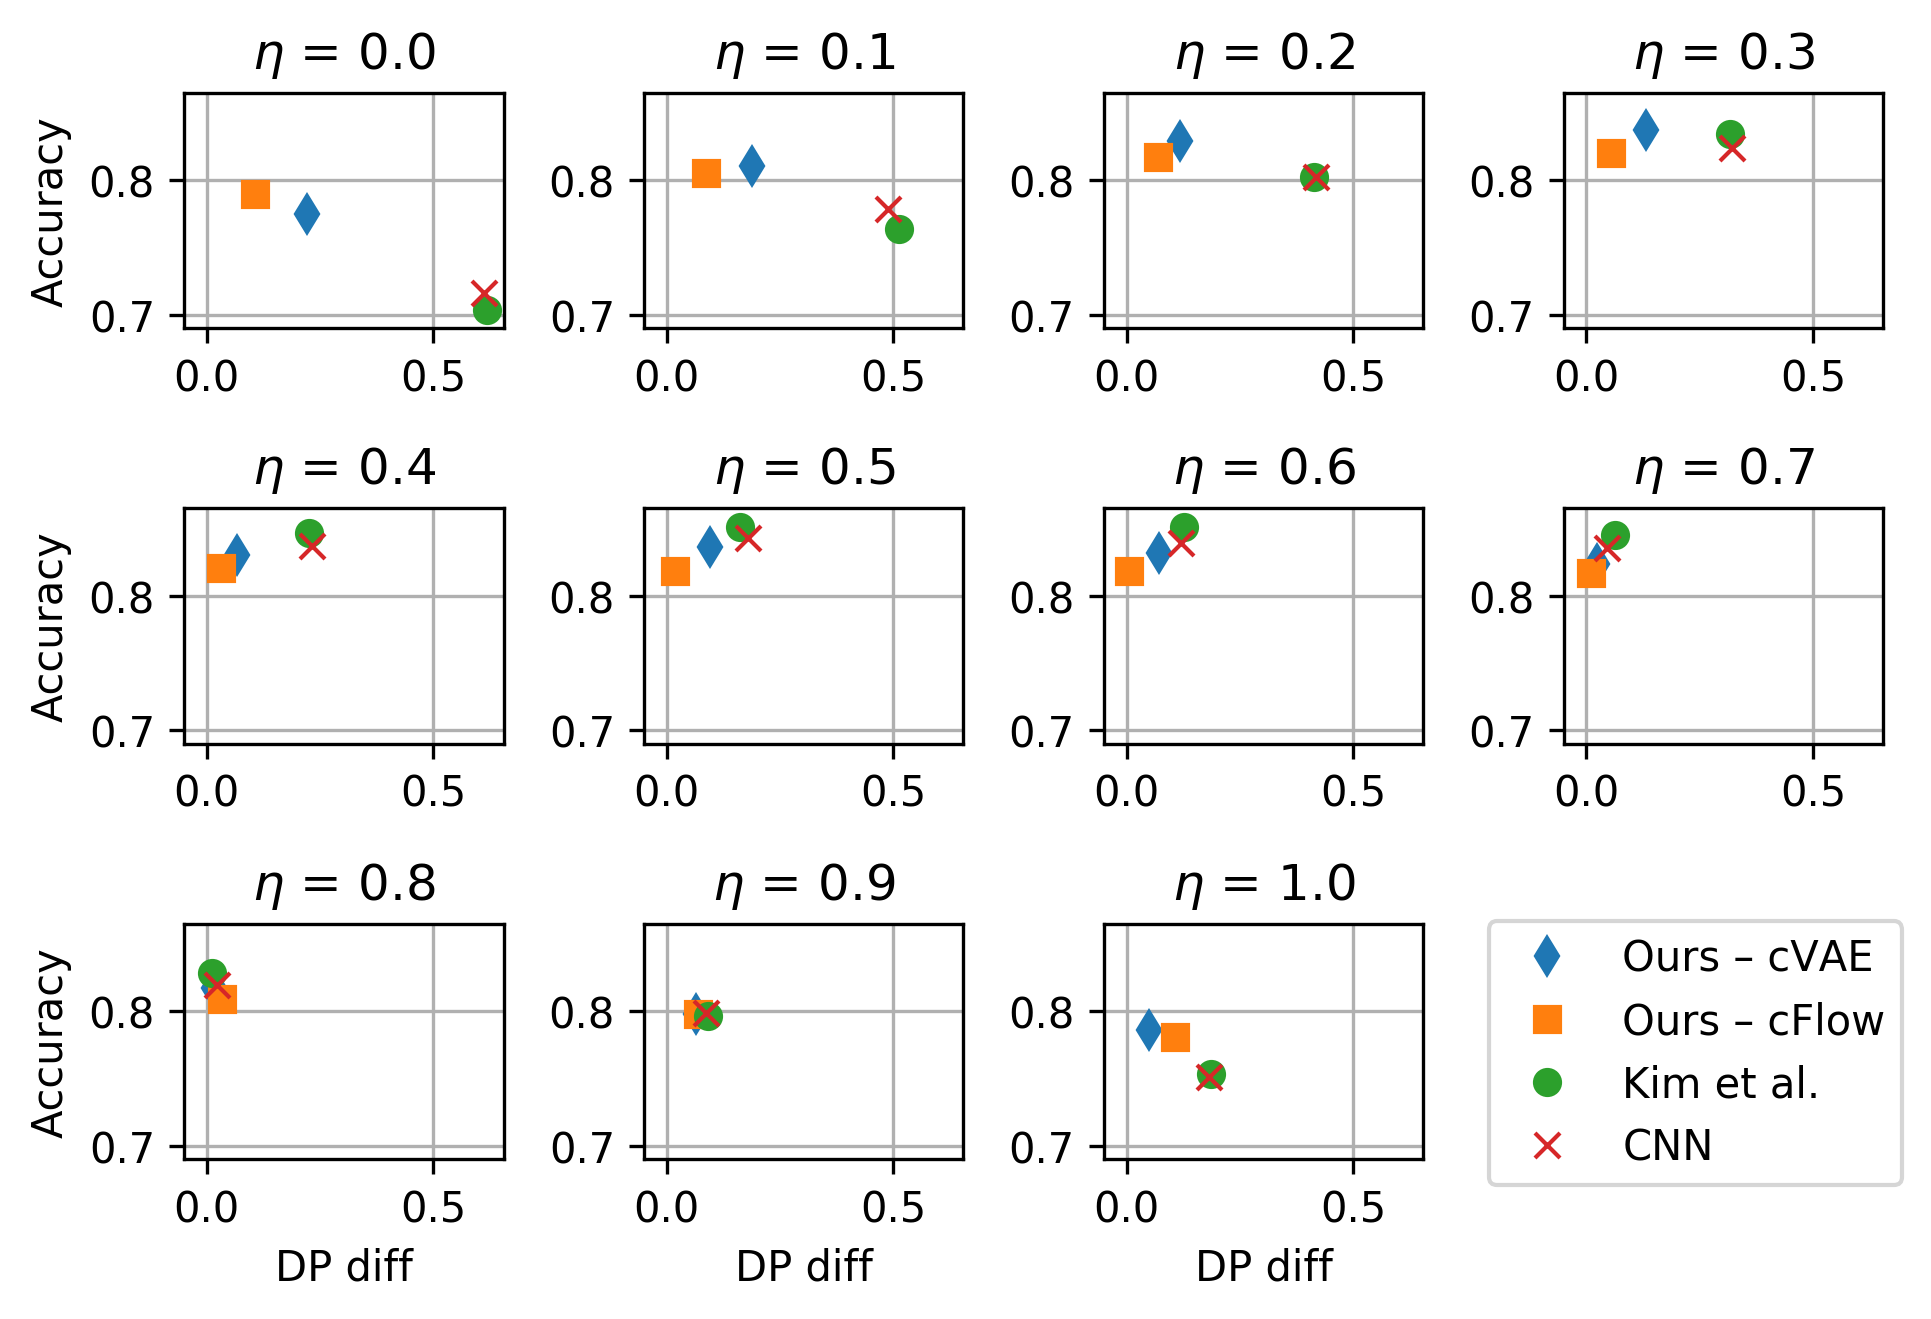

In [7]:
fig, plots = plt.subplots(nrows=3, ncols=4, figsize=(6.5, 4.5), dpi=300)#, facecolor='white')
flat_plots = []
for plot in plots:
    flat_plots += plot.tolist()

for i, (plot, mix_fact) in enumerate(zip(flat_plots, [.0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1., None])):
    for method, shape in zip(("Ours – cVAE", "Ours – cFlow", "Kim et al.", "CNN"), ("d", "s", "o", "x")):
        data = all_data.query(f"Mix_fact == \"{mix_fact}\" & Method == \"{method}\"")
        plot.plot(data["prob_pos_sex_Male_0-sex_Male_1"], data["Accuracy"], marker=shape, linestyle="", label=method)
    if mix_fact is not None:
        plot.set_title(f"$\\eta$ = {mix_fact}")
    plot.grid(True)
    plot.set_xlim((-.05, .655))
    plot.set_ylim((0.69, 0.865))
    if i == 11:
        plot.axis("off")
        plot.legend(loc='upper left', bbox_to_anchor=(-0.3, 1.1))
    if i in (8, 9, 10):
        plot.set_xlabel("DP diff")
    if i in (0, 4, 8):
        plot.set_ylabel("Accuracy")

fig.tight_layout()
fig.savefig("nosinn_adult_multiplot_all_landscape_diff.pdf")